# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from main import PromptToQueryResult
from services import Service

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: yıllara göre satış trendi
Rephrased prompt: Find the total sales trend over the years by calculating order values and grouping them by year. Show the yearly progression of sales volume to identify growth patterns and seasonal trends. Visualize this data using a line chart with years on the x-axis and total sales amount on the y-axis, adding trend lines to highlight the overall business growth direction.

Recommended visualization: Line chart with year-over-year trend analysis#
SQL:  
SELECT 
    STRFTIME('%Y', o.order_date) as year,
    ROUND(SUM((oi.quantity * oi.list_price) * (1 - oi.discount)), 2) as total_sales
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY STRFTIME('%Y', o.order_date)
ORDER BY year;

PYTHON: 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
x = df['year']
y = df['total_sales']

# Plot actual data points
plt.plot(x, y, marker='o', lines

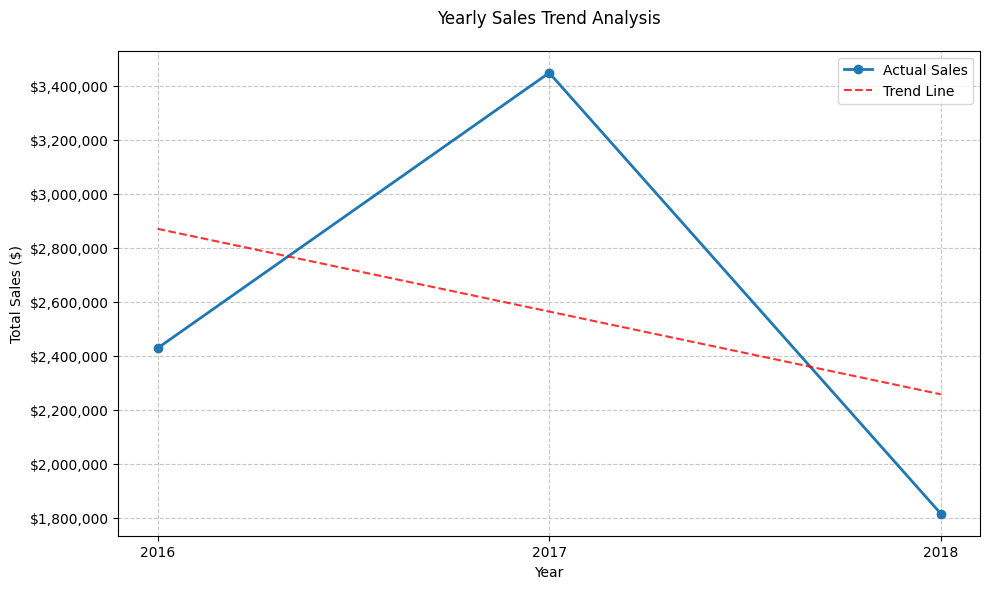

🧮 Token usage and estimated cost:
Selected Service   : ClaudeAI
Default Model Used : claude-3.5-sonnet
Prompt tokens      : 6224
Completion tokens  : 376
Total tokens       : 6600
Estimated Cost (USD): $0.024312
🧮 Token usage and estimated cost:
Rephrase tokens    : 2029
Rep. resp. tokens  : 78
Prompt tokens      : 4195
Response tokens    : 298
Total tokens       : 4493
Estimated cost (USD): $0.024312


,year,total_sales
0,2016,2427378.53
1,2017,3447208.24
2,2018,1814529.79


In [4]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.ClaudeAI)

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.AzureOpenAI)

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="Llama318BInstruct", model_mode="chat")

In [ ]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="mistralaiMixtral8xbInstruct01", model_mode="chat")

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: yıllara göre satış trendi
Rephrased prompt: Show the sales trend over the years with a line chart.#
SQL:  
SELECT p.model_year AS year, SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS sales
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.model_year
ORDER BY p.model_year;

PYTHON: 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the query result
x = df['year']
y = df['sales']

plt.plot(x, y, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trend Over the Years')
plt.show()



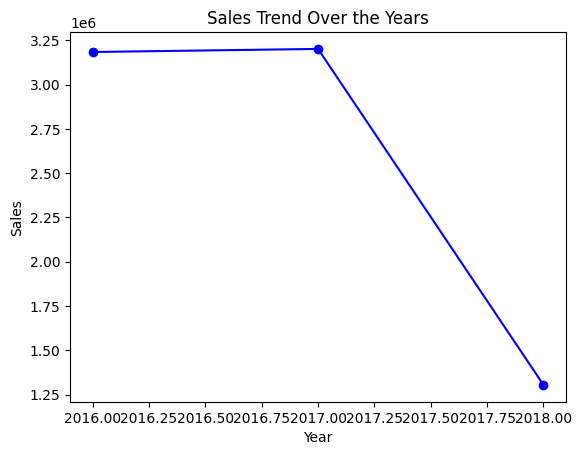

🧮 Token usage and estimated cost:
Selected Service   : AzureOpenAI
Default Model Used : gpt-4o
Prompt tokens      : 6139
Completion tokens  : 157
Total tokens       : 6296
Estimated Cost (USD): $0.033050
🧮 Token usage and estimated cost:
Rephrase tokens    : 2015
Rep. resp. tokens  : 12
Prompt tokens      : 4124
Response tokens    : 145
Total tokens       : 4269
Estimated cost (USD): $0.033050


,year,sales
0,2016,3.183430e+06
1,2017,3.200791e+06
2,2018,1.304896e+06


In [3]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.AzureOpenAI)

In [ ]:
from main import GenerateQuestions
from main import ReadQuestionsAndGenerateAnswers
from services import Service

In [ ]:
await GenerateQuestions(selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.AzureOpenAI, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.Gemini, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2024-12-27.txt", selected_service=Service.DeepSeek, debug=False)

In [ ]:
await GenerateQuestions(selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-03.txt", selected_service=Service.Gemini, debug=True)

In [ ]:
await GenerateQuestions(selected_service=Service.Gemini, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.ClaudeAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.AzureOpenAI, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-01-04.txt", selected_service=Service.Gemini, debug=True)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-04-07.txt", selected_service=Service.ClaudeAI, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-04-07.txt", selected_service=Service.AzureOpenAI, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-04-07.txt", selected_service=Service.DeepSeek, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-04-07.txt", selected_service=Service.Gemini, debug=False)

In [ ]:
await ReadQuestionsAndGenerateAnswers(filename="questions/2025-04-07.txt", selected_service=Service.Llama, debug=False)

In [ ]:
from main import process_scores
from services import Service

In [ ]:
await process_scores("2025-04-07", "scores/2025-04-07.xlsx", Service.AzureOpenAI)

In [ ]:
from query_facade import QueryFacade

In [ ]:
facade = QueryFacade(
        service=Service.AzureOpenAI,
        model_name="",
        model_mode="",
        debug=True
    )

df = await facade.prompt_to_query_result()
